# Importing Libraries

In [240]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Data Reading

In [241]:
df=pd.read_csv('/content/Ecommerce_data.csv',encoding="ISO-8859-1")

In [242]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [243]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [244]:
df.dtypes


InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Dropping null values row in description column

In [245]:
df=df.dropna(subset=['Description'])
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [246]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

In [247]:
df['Description']

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 540455, dtype: object

Removing all numerical data inside Description column

In [248]:
df['Description'] = df['Description'].str.replace('\d+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Word Tokenisation

In [249]:
df['Word_Description']=df.loc[:,"Description"].apply(lambda x: nltk.word_tokenize(str(x).lower()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Puntuation Removal

In [250]:
#import RegxpTokenizer
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\w+')


In [251]:
df['Punctuation_Description']=df.loc[:,"Word_Description"].apply(lambda x: tokenizer.tokenize(str(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [252]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Word_Description,Punctuation_Description
541904,581587,22613,PACK OF SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,"[pack, of, spaceboy, napkins]","[pack, of, spaceboy, napkins]"
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,"[children, 's, apron, dolly, girl]","[children, s, apron, dolly, girl]"
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,"[childrens, cutlery, dolly, girl]","[childrens, cutlery, dolly, girl]"
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,"[childrens, cutlery, circus, parade]","[childrens, cutlery, circus, parade]"
541908,581587,22138,BAKING SET PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France,"[baking, set, piece, retrospot]","[baking, set, piece, retrospot]"


## Stop Words Removal

In [253]:
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
df['Stop_words_rem_description'] = df['Punctuation_Description'].apply(lambda x: [word for word in x if word not in (stop_words)])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [254]:
df.count()

InvoiceNo                     540455
StockCode                     540455
Description                   540455
Quantity                      540455
InvoiceDate                   540455
UnitPrice                     540455
CustomerID                    406829
Country                       540455
Word_Description              540455
Punctuation_Description       540455
Stop_words_rem_description    540455
dtype: int64

In [255]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Word_Description,Punctuation_Description,Stop_words_rem_description
541904,581587,22613,PACK OF SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,"[pack, of, spaceboy, napkins]","[pack, of, spaceboy, napkins]","[pack, spaceboy, napkins]"
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,"[children, 's, apron, dolly, girl]","[children, s, apron, dolly, girl]","[children, apron, dolly, girl]"
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,"[childrens, cutlery, dolly, girl]","[childrens, cutlery, dolly, girl]","[childrens, cutlery, dolly, girl]"
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,"[childrens, cutlery, circus, parade]","[childrens, cutlery, circus, parade]","[childrens, cutlery, circus, parade]"
541908,581587,22138,BAKING SET PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France,"[baking, set, piece, retrospot]","[baking, set, piece, retrospot]","[baking, set, piece, retrospot]"


# Pos Tagging and Lematisation

In [256]:
# Begin Lemmatization 
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
#nltk.download('averaged_perceptron_tagger') # Run atleast once 

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(list_words):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(list_words)  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)
df['lematizer_des'] = df['Stop_words_rem_description'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [257]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Word_Description,Punctuation_Description,Stop_words_rem_description,lematizer_des
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,"[white, hanging, heart, t-light, holder]","[white, hanging, heart, t, light, holder]","[white, hanging, heart, light, holder]",white hang heart light holder
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,"[white, metal, lantern]","[white, metal, lantern]","[white, metal, lantern]",white metal lantern
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,"[cream, cupid, hearts, coat, hanger]","[cream, cupid, hearts, coat, hanger]","[cream, cupid, hearts, coat, hanger]",cream cupid heart coat hanger
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,"[knitted, union, flag, hot, water, bottle]","[knitted, union, flag, hot, water, bottle]","[knitted, union, flag, hot, water, bottle]",knit union flag hot water bottle
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,"[red, woolly, hottie, white, heart, .]","[red, woolly, hottie, white, heart]","[red, woolly, hottie, white, heart]",red woolly hottie white heart


In [258]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Word_Description,Punctuation_Description,Stop_words_rem_description,lematizer_des
541904,581587,22613,PACK OF SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,"[pack, of, spaceboy, napkins]","[pack, of, spaceboy, napkins]","[pack, spaceboy, napkins]",pack spaceboy napkin
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,"[children, 's, apron, dolly, girl]","[children, s, apron, dolly, girl]","[children, apron, dolly, girl]",child apron dolly girl
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,"[childrens, cutlery, dolly, girl]","[childrens, cutlery, dolly, girl]","[childrens, cutlery, dolly, girl]",childrens cutlery dolly girl
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,"[childrens, cutlery, circus, parade]","[childrens, cutlery, circus, parade]","[childrens, cutlery, circus, parade]",childrens cutlery circus parade
541908,581587,22138,BAKING SET PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France,"[baking, set, piece, retrospot]","[baking, set, piece, retrospot]","[baking, set, piece, retrospot]",bake set piece retrospot


## Droping duplicate values in lematiser_des column

In [259]:
df1=df['lematizer_des'].drop_duplicates()
df1=pd.DataFrame(df1)
df1=df1.reset_index(drop=True)
df1

,lematizer_des
0,white hang heart light holder
1,white metal lantern
2,cream cupid heart coat hanger
3,knit union flag hot water bottle
4,red woolly hottie white heart
...,...
4042,letter u bling key ring
4043,wet box
4044,mixed
4045,cream hang heart light holder


In [260]:
df1.isna().sum()

lematizer_des    0
dtype: int64

## Visualising most frequent Words

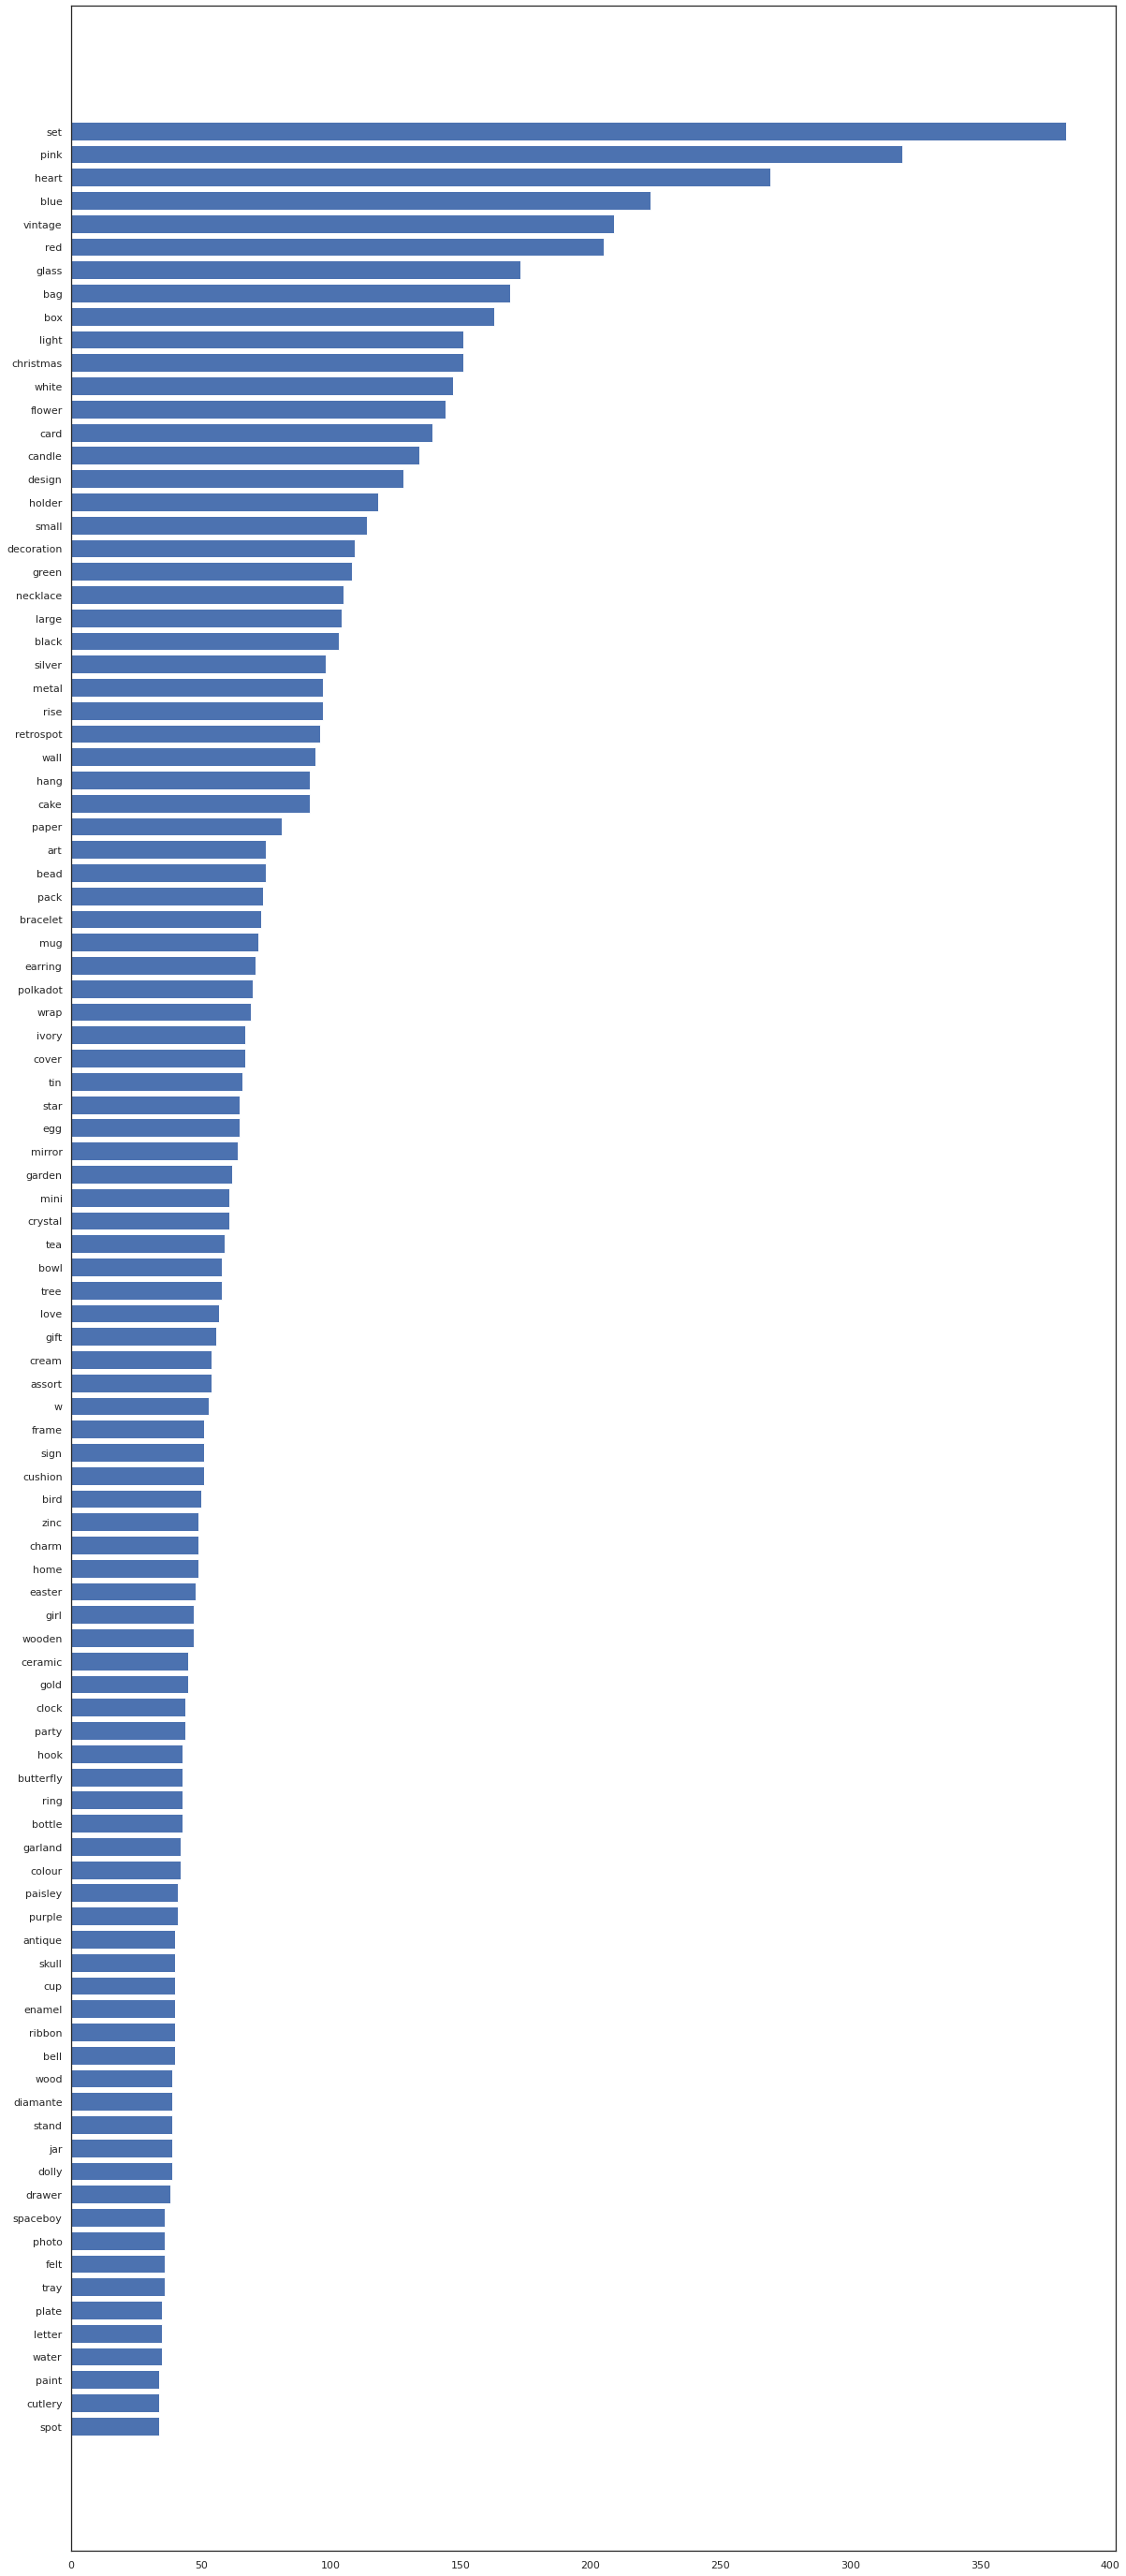

In [261]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data


#Extracts words into list and count frequency
all_words = ' '.join([text for text in df1['lematizer_des']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n =100) 

words_df.sort_values('count',inplace = True)
words_df

# Plotting 30 frequent words
plt.figure(figsize=(20,50))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

## Word Cloud

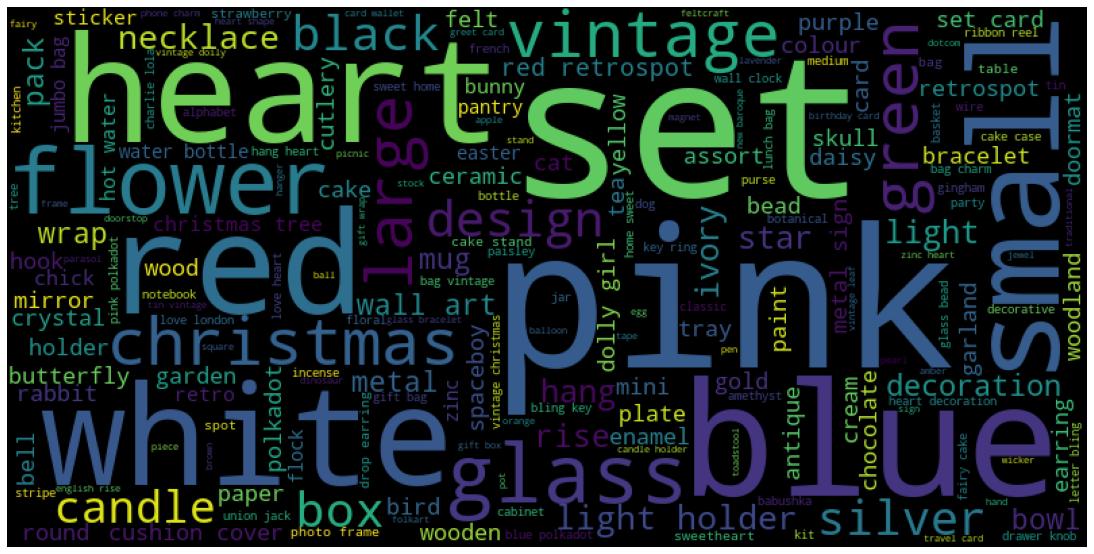

In [262]:
from wordcloud import WordCloud
for_wordcloud_str = ' '.join([text for text in df1['lematizer_des']])

wordcloud = WordCloud(width=800, height=400, background_color ='black',
                      min_font_size = 7).generate(for_wordcloud_str)

plt.figure(figsize=(15, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
 
plt.show()

### Ml Algorithms does not take string datas to model so we are converting str into numerical values using Bag of WordsModel

# Bag of Words

In Bag of Words model  Count Vectoriser frequency model is used to get values

### Count Vectoriser

In [263]:
from sklearn.feature_extraction.text import CountVectorizer
# Step 2. Design the Vocabulary
# The default token pattern removes tokens of a single character. That's why we don't have the "I" and "s" tokens in the output
count_vectorizer = CountVectorizer(binary=False)
# Step 3. Create the Bag-of-Words Model
count_values = count_vectorizer.fit_transform(df1['lematizer_des']).toarray() # fit - design the vocbulary and transform will convert the text into numbers based on the presence of the word
# Show the Bag-of-Words Model as a pandas DataFrame
feature_names = count_vectorizer.get_feature_names()
df2_count=pd.DataFrame(count_values, columns = feature_names)
df2_count

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,abc,abstract,acapulco,account,acrylic,add,address,ade,adjust,adjustment,...,write,wrong,wrongly,xcm,xmas,xxcm,yellow,yuletide,zero,zinc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


It is a Unsupervised Learning problem  so  i'm going to use K-Means clustering  to find similar patterns in the data

# K-Means Algorithm

Find the best value of k using Elbow plot

### Elbow Plot

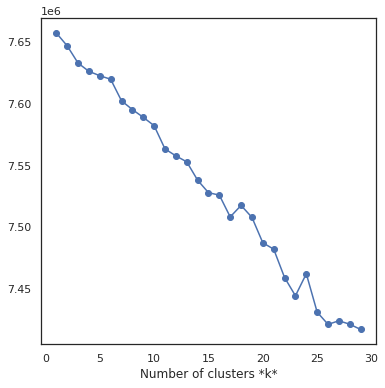

In [264]:
#for k means clustering scaling the data is mandatory 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scale=StandardScaler()
X=scale.fit_transform(df2_count.values)
inertias = []
list_k = list(range(1,30))
from sklearn.cluster import KMeans
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    inertias.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel(''); 

Subjectively i am taking k value as 25

### Kmeans clustering k=25

In [265]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
km = KMeans(n_clusters=25) 
km.fit(X) 
centroids = km.cluster_centers_ 



In [266]:
km.inertia_

7442477.996527074

In [267]:
km.labels_
#it tell us each data which group belongs to

array([0, 0, 0, ..., 8, 0, 8], dtype=int32)

In [268]:
df2=pd.DataFrame(km.labels_,columns=['Group_no'],index=None)
df2

,Group_no
0,0
1,0
2,0
3,8
4,0
...,...
4042,8
4043,8
4044,8
4045,0


In [269]:
df1


,lematizer_des
0,white hang heart light holder
1,white metal lantern
2,cream cupid heart coat hanger
3,knit union flag hot water bottle
4,red woolly hottie white heart
...,...
4042,letter u bling key ring
4043,wet box
4044,mixed
4045,cream hang heart light holder


creating new Data Frame df3  with description data and their group

In [270]:
df3=pd.concat([df1,df2],axis=1)
df3

,lematizer_des,Group_no
0,white hang heart light holder,0
1,white metal lantern,0
2,cream cupid heart coat hanger,0
3,knit union flag hot water bottle,8
4,red woolly hottie white heart,0
...,...,...
4042,letter u bling key ring,8
4043,wet box,8
4044,mixed,8
4045,cream hang heart light holder,0


In [271]:
df3.tail()

,lematizer_des,Group_no
4042,letter u bling key ring,8
4043,wet box,8
4044,mixed,8
4045,cream hang heart light holder,0
4046,paper craft little birdie,8


Merging df3 Data Frame and original df Data Frame with lematizer_des column

In [272]:
df4=pd.merge(df,df3,how='left', on='lematizer_des')

In [273]:
df4

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Word_Description,Punctuation_Description,Stop_words_rem_description,lematizer_des,Group_no
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,"[white, hanging, heart, t-light, holder]","[white, hanging, heart, t, light, holder]","[white, hanging, heart, light, holder]",white hang heart light holder,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,"[white, metal, lantern]","[white, metal, lantern]","[white, metal, lantern]",white metal lantern,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,"[cream, cupid, hearts, coat, hanger]","[cream, cupid, hearts, coat, hanger]","[cream, cupid, hearts, coat, hanger]",cream cupid heart coat hanger,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,"[knitted, union, flag, hot, water, bottle]","[knitted, union, flag, hot, water, bottle]","[knitted, union, flag, hot, water, bottle]",knit union flag hot water bottle,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,"[red, woolly, hottie, white, heart, .]","[red, woolly, hottie, white, heart]","[red, woolly, hottie, white, heart]",red woolly hottie white heart,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540450,581587,22613,PACK OF SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,"[pack, of, spaceboy, napkins]","[pack, of, spaceboy, napkins]","[pack, spaceboy, napkins]",pack spaceboy napkin,8
540451,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,"[children, 's, apron, dolly, girl]","[children, s, apron, dolly, girl]","[children, apron, dolly, girl]",child apron dolly girl,8
540452,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,"[childrens, cutlery, dolly, girl]","[childrens, cutlery, dolly, girl]","[childrens, cutlery, dolly, girl]",childrens cutlery dolly girl,8
540453,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,"[childrens, cutlery, circus, parade]","[childrens, cutlery, circus, parade]","[childrens, cutlery, circus, parade]",childrens cutlery circus parade,8


In [274]:
df4.isna().sum()

InvoiceNo                          0
StockCode                          0
Description                        0
Quantity                           0
InvoiceDate                        0
UnitPrice                          0
CustomerID                    133626
Country                            0
Word_Description                   0
Punctuation_Description            0
Stop_words_rem_description         0
lematizer_des                      0
Group_no                           0
dtype: int64

Dropping unwanted columns and null value rows in df4 Data Frame and creating another dataframe called df5

In [275]:
df5=df4.drop(columns=['Stop_words_rem_description','Punctuation_Description','Word_Description','InvoiceNo','StockCode','InvoiceDate','lematizer_des','Description'])
df5=df5.dropna()
df5=df5.reset_index(drop=True)

In [276]:
df5

,Quantity,UnitPrice,CustomerID,Country,Group_no
0,6,2.55,17850.0,United Kingdom,0
1,6,3.39,17850.0,United Kingdom,0
2,8,2.75,17850.0,United Kingdom,0
3,6,3.39,17850.0,United Kingdom,8
4,6,3.39,17850.0,United Kingdom,0
...,...,...,...,...,...
406824,12,0.85,12680.0,France,8
406825,6,2.10,12680.0,France,8
406826,4,4.15,12680.0,France,8
406827,4,4.15,12680.0,France,8


As of now we found the groups now we are going to create k coloums in original dataset like one hot encoding

In [277]:
df6=pd.concat([df5, pd.get_dummies(df5["Group_no"])],axis=1)
df6

,Quantity,UnitPrice,CustomerID,Country,Group_no,0,1,2,3,4,...,13,14,15,16,17,18,19,20,21,24
0,6,2.55,17850.0,United Kingdom,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,3.39,17850.0,United Kingdom,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,2.75,17850.0,United Kingdom,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,3.39,17850.0,United Kingdom,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,3.39,17850.0,United Kingdom,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406824,12,0.85,12680.0,France,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
406825,6,2.10,12680.0,France,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
406826,4,4.15,12680.0,France,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
406827,4,4.15,12680.0,France,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [278]:
df6.tail()

,Quantity,UnitPrice,CustomerID,Country,Group_no,0,1,2,3,4,...,13,14,15,16,17,18,19,20,21,24
406824,12,0.85,12680.0,France,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
406825,6,2.10,12680.0,France,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
406826,4,4.15,12680.0,France,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
406827,4,4.15,12680.0,France,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
406828,3,4.95,12680.0,France,21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Still in df6['country'] column in string data so we are doing LabelEncoding

## Label Encoding

In [279]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
Encode_coun=en.fit_transform(df6['Country'])
df7=pd.DataFrame(Encode_coun,columns=['Encode_coun'])
#df7=pd.get_dummies(df6['Country'])
df7

,Encode_coun
0,35
1,35
2,35
3,35
4,35
...,...
406824,13
406825,13
406826,13
406827,13


cocatinating labeled dataframe to existing dataframe droping unwanted columns

In [280]:
df8=pd.concat([df6,df7],axis=1)
df8=df8.dropna()
df8.CustomerID = df8.CustomerID.astype(int)
df8=df8.drop(columns=['Country','Group_no'])
df8

,Quantity,UnitPrice,CustomerID,0,1,2,3,4,5,7,...,14,15,16,17,18,19,20,21,24,Encode_coun
0,6,2.55,17850,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35
1,6,3.39,17850,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35
2,8,2.75,17850,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35
3,6,3.39,17850,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35
4,6,3.39,17850,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406824,12,0.85,12680,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
406825,6,2.10,12680,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
406826,4,4.15,12680,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
406827,4,4.15,12680,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13


Based on customer id we are taking the mean value of all those columns

In [316]:
df9=df8.groupby('CustomerID').mean()
df9=df9.reset_index(drop=True)


In [317]:
df9

,Quantity,UnitPrice,0,1,2,3,4,5,7,8,...,14,15,16,17,18,19,20,21,24,Encode_coun
0,0.000000,1.040000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.000000,35.0
1,13.505495,2.644011,0.098901,0.0,0.0,0.0,0.000000,0.0,0.0,0.769231,...,0.021978,0.0,0.005495,0.0,0.0,0.0,0.0,0.093407,0.010989,16.0
2,75.516129,5.764839,0.032258,0.0,0.0,0.0,0.000000,0.0,0.0,0.870968,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.096774,0.000000,12.0
3,8.643836,8.289041,0.136986,0.0,0.0,0.0,0.054795,0.0,0.0,0.575342,...,0.013699,0.0,0.000000,0.0,0.0,0.0,0.0,0.219178,0.000000,18.0
4,11.588235,3.841176,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,4.500000,4.765000,0.100000,0.0,0.0,0.0,0.000000,0.0,0.0,0.800000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.100000,0.000000,35.0
4368,7.714286,5.622857,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.714286,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.285714,0.000000,35.0
4369,7.538462,4.821538,0.076923,0.0,0.0,0.0,0.000000,0.0,0.0,0.769231,...,0.076923,0.0,0.000000,0.0,0.0,0.0,0.0,0.076923,0.000000,35.0
4370,1.847884,1.614987,0.029101,0.0,0.0,0.0,0.033069,0.0,0.0,0.871693,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.066138,0.000000,35.0


when we do groupby with customerid first it will sort the dataframe based on customer id and take the mean value so we are creating another dataframe which sorts the customer id and droped duplicate values because when we are going to merge those two dataframe order of cus id and their values will be maintained correctly

In [318]:
df10=df8['CustomerID'].sort_values()
df10=df10.drop_duplicates()
df10=df10.reset_index(drop=True)
df10

0       12346
1       12347
2       12348
3       12349
4       12350
        ...  
4367    18280
4368    18281
4369    18282
4370    18283
4371    18287
Name: CustomerID, Length: 4372, dtype: int64

as i said above now customer id and their values maintained correctly

In [319]:
df11=pd.concat([df10,df9],axis=1)

In [320]:
df11

,CustomerID,Quantity,UnitPrice,0,1,2,3,4,5,7,...,14,15,16,17,18,19,20,21,24,Encode_coun
0,12346,0.000000,1.040000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.000000,35.0
1,12347,13.505495,2.644011,0.098901,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.021978,0.0,0.005495,0.0,0.0,0.0,0.0,0.093407,0.010989,16.0
2,12348,75.516129,5.764839,0.032258,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.096774,0.000000,12.0
3,12349,8.643836,8.289041,0.136986,0.0,0.0,0.0,0.054795,0.0,0.0,...,0.013699,0.0,0.000000,0.0,0.0,0.0,0.0,0.219178,0.000000,18.0
4,12350,11.588235,3.841176,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280,4.500000,4.765000,0.100000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.100000,0.000000,35.0
4368,18281,7.714286,5.622857,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.285714,0.000000,35.0
4369,18282,7.538462,4.821538,0.076923,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.076923,0.0,0.000000,0.0,0.0,0.0,0.0,0.076923,0.000000,35.0
4370,18283,1.847884,1.614987,0.029101,0.0,0.0,0.0,0.033069,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.066138,0.000000,35.0


In [321]:
df11['CustomerID'].isna().sum()

0

Now i am doing K-Means clustering using all the features of the dataframe df11

with min max scaling

In [322]:
val=df11.values

In [323]:
val

array([[1.23460000e+04, 0.00000000e+00, 1.04000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 3.50000000e+01],
       [1.23470000e+04, 1.35054945e+01, 2.64401099e+00, ...,
        9.34065934e-02, 1.09890110e-02, 1.60000000e+01],
       [1.23480000e+04, 7.55161290e+01, 5.76483871e+00, ...,
        9.67741935e-02, 0.00000000e+00, 1.20000000e+01],
       ...,
       [1.82820000e+04, 7.53846154e+00, 4.82153846e+00, ...,
        7.69230769e-02, 0.00000000e+00, 3.50000000e+01],
       [1.82830000e+04, 1.84788360e+00, 1.61498677e+00, ...,
        6.61375661e-02, 0.00000000e+00, 3.50000000e+01],
       [1.82870000e+04, 2.26571429e+01, 1.49357143e+00, ...,
        2.42857143e-01, 0.00000000e+00, 3.50000000e+01]])

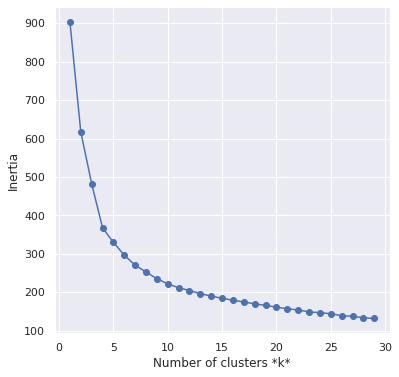

In [324]:
#with min max scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scale=MinMaxScaler()
X=scale.fit_transform(val)
inertias = []
list_k = list(range(1,30))
from sklearn.cluster import KMeans
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    inertias.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Inertia'); 

In [325]:
km = KMeans(n_clusters=6,init='k-means++') 
km.fit(X) 

KMeans(n_clusters=6)

In [326]:
km.inertia_

296.738646681291

Plot using first two columns

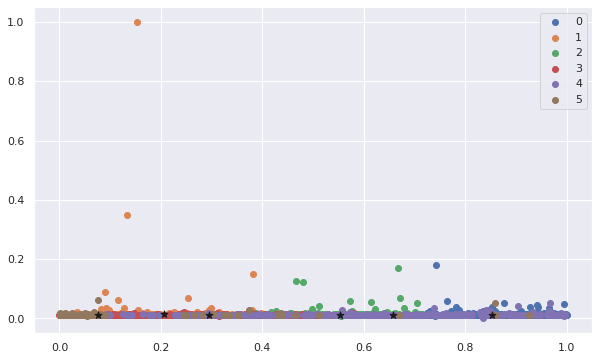

In [327]:
#Getting the Centroids
import numpy as np
centroids = km.cluster_centers_
label=km.fit_predict(X)
labels = np.unique(label)
 
#plotting the results:

plt.figure(figsize=(10,6)) 
for i in labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 52,marker='*', color = 'k')
plt.legend()
plt.show()

Tried to plot using 26 columns using loop

No handles with labels found to put in legend.


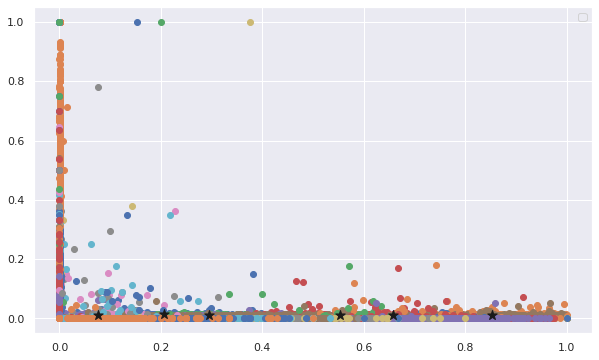

In [328]:
#Getting the Centroids
import numpy as np
centroids = km.cluster_centers_
label=km.fit_predict(X)
labels = np.unique(label)
 
#plotting the results:

plt.figure(figsize=(10,6)) 
for i in range(0,24,2):
    plt.scatter(X[label == 0 , i] , X[label == 0 , (i+1)] )
    plt.scatter(X[label == 1 , i] , X[label == 1 , (i+1)] )
    plt.scatter(X[label == 2 , i] , X[label == 2 , (i+1)] )
    plt.scatter(X[label == 3 , i] , X[label == 3 , (i+1)] )
    plt.scatter(X[label == 4 , i] , X[label == 4 , (i+1)] )
    plt.scatter(X[label == 5 , i] , X[label == 5 , (i+1)] )
plt.scatter(centroids[:,0] , centroids[:,1] , s =100,marker='*', color = 'k')
plt.legend()
plt.show()

In [329]:
label

array([2, 4, 4, ..., 1, 1, 1], dtype=int32)

In [330]:
labels

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [331]:
X.shape

(4372, 25)

In [332]:
cus_group=pd.DataFrame(km.labels_,columns=['customer_Group'])
cus_group

,customer_Group
0,2
1,4
2,4
3,4
4,0
...,...
4367,1
4368,1
4369,1
4370,1


In [333]:
fin=pd.concat([df11['CustomerID'],cus_group],axis=1)
fin

,CustomerID,customer_Group
0,12346,2
1,12347,4
2,12348,4
3,12349,4
4,12350,0
...,...,...
4367,18280,1
4368,18281,1
4369,18282,1
4370,18283,1


fin dataframe has the datas of customer id and their customer group

I have done EDA plot to visualise customers which group belongs to

In [334]:
import plotly.express as px
fig=px.bar(fin,x='CustomerID',y='customer_Group')
fig.show()

Without scaling

In [335]:
val=df11.values

In [336]:
val

array([[1.23460000e+04, 0.00000000e+00, 1.04000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 3.50000000e+01],
       [1.23470000e+04, 1.35054945e+01, 2.64401099e+00, ...,
        9.34065934e-02, 1.09890110e-02, 1.60000000e+01],
       [1.23480000e+04, 7.55161290e+01, 5.76483871e+00, ...,
        9.67741935e-02, 0.00000000e+00, 1.20000000e+01],
       ...,
       [1.82820000e+04, 7.53846154e+00, 4.82153846e+00, ...,
        7.69230769e-02, 0.00000000e+00, 3.50000000e+01],
       [1.82830000e+04, 1.84788360e+00, 1.61498677e+00, ...,
        6.61375661e-02, 0.00000000e+00, 3.50000000e+01],
       [1.82870000e+04, 2.26571429e+01, 1.49357143e+00, ...,
        2.42857143e-01, 0.00000000e+00, 3.50000000e+01]])

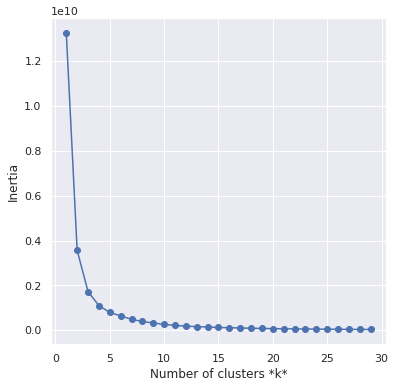

In [337]:
#without scaling
inertias = []
list_k = list(range(1,30))
from sklearn.cluster import KMeans
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(val)
    inertias.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Inertia'); 

In [338]:
km = KMeans(n_clusters=6,init='k-means++') 
km.fit(val) 

KMeans(n_clusters=6)

In [339]:
km.inertia_

644616920.0141978

In [340]:
cus_group1=pd.DataFrame(km.labels_,columns=['customer_Group'])
cus_group1

,customer_Group
0,0
1,0
2,0
3,0
4,0
...,...
4367,2
4368,2
4369,2
4370,2


In [341]:
fin=pd.concat([df11['CustomerID'],cus_group1],axis=1)
fin

,CustomerID,customer_Group
0,12346,0
1,12347,0
2,12348,0
3,12349,0
4,12350,0
...,...,...
4367,18280,2
4368,18281,2
4369,18282,2
4370,18283,2


This fin dataframe has datas of customer id and their groups

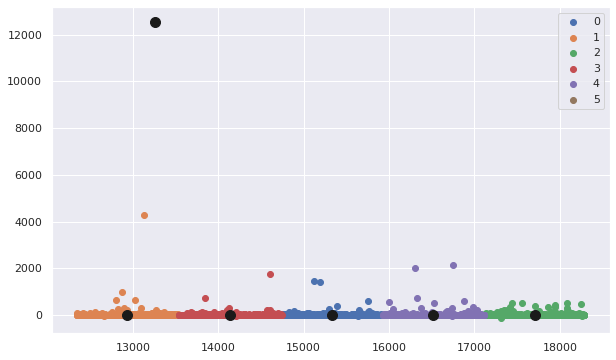

In [342]:
#Getting the Centroids
import numpy as np
centroids = km.cluster_centers_
label=km.fit_predict(val)
labels = np.unique(label)
 
#plotting the results:

plt.figure(figsize=(10, 6)) 
for i in labels:
    plt.scatter(val[label == i , 0] , val[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'k')
plt.legend()
plt.show()

No handles with labels found to put in legend.


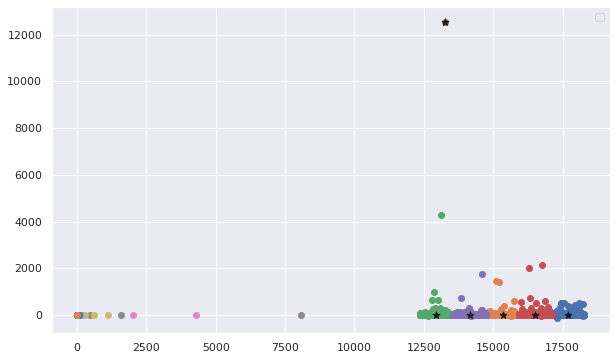

In [343]:
import numpy as np
centroids = km.cluster_centers_
label=km.fit_predict(val)
labels = np.unique(label)
 
#plotting the results:

plt.figure(figsize=(10,6)) 
for i in range(0,24,2):
    plt.scatter(val[label == 0 , i] , val[label == 0 , (i+1)] )
    plt.scatter(val[label == 1 , i] , val[label == 1 , (i+1)] )
    plt.scatter(val[label == 2 , i] , val[label == 2 , (i+1)] )
    plt.scatter(val[label == 3 , i] , val[label == 3 , (i+1)] )
    plt.scatter(val[label == 4 , i] , val[label == 4 , (i+1)] )
    plt.scatter(val[label == 5 , i] , val[label == 5 , (i+1)] )
plt.scatter(centroids[:,0] , centroids[:,1] , s = 52,marker='*', color = 'k')
plt.legend()
plt.show()

I have done EDA plot to visualise customers which group belongs to

In [347]:
import plotly.express as px
fig=px.bar(fin,x='CustomerID',y='customer_Group')
fig.show()

In [344]:
val.shape

(4372, 25)

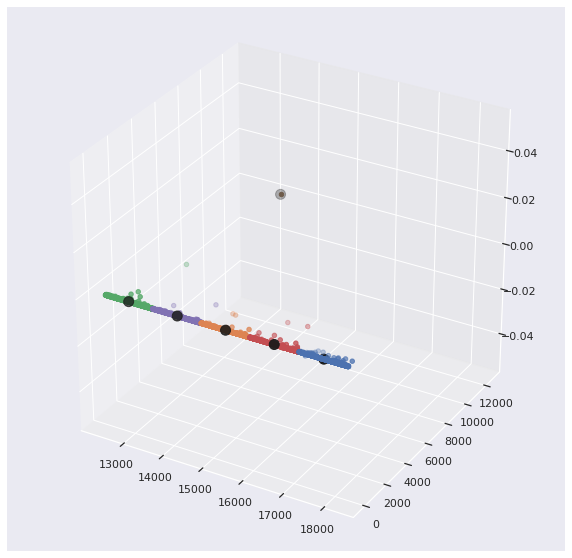

In [345]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


sns.set(style = "darkgrid")

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')
for i in labels:
    ax.scatter(val[label == i , 0] , val[label == i , 1],label = i)
ax.scatter(centroids[:,0] , centroids[:,1], s = 100, color = 'k')
plt.show()

In [346]:
fin

,CustomerID,customer_Group
0,12346,0
1,12347,0
2,12348,0
3,12349,0
4,12350,0
...,...,...
4367,18280,2
4368,18281,2
4369,18282,2
4370,18283,2


## fin dataframe has the datas of customer id and their customer group